# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals Inc. is a cutting-edge pharmaceutical company specializing in the development of anti-cancer medications. In a recent animal study, 249 mice diagnosed with squamous cell carcinoma (SCC) tumors were treated with a diverse range of drug regimens and their tumor development was closely monitored and measured over a 45-day period. The primary objective of this study was to compare the efficacy of Pymaceuticals' flagship drug, Capomulin, against other treatment options.

The results of the study indicate that Capomulin and Ramicane were the most effective in reducing tumor size and improving the survival rate of the mice. In terms of efficacy, Ramicane was found to be slightly superior to Capomulin, as evidenced by its smaller mean, median, and standard deviation values.

In addition, data analysis of randomly selected mice from the Capomulin and Ramicane groups revealed that the drugs displayed different temporal patterns of efficacy. Ramicane was observed to reduce the size of the tumors rapidly in the initial 15 days, after which the size began to increase. On the other hand, Capomulin reduced the size of the tumors gradually and over a longer period of time. The tumor size appeared to increase after 30 days, which was double the time observed with Ramicane.

The study also found a significant negative correlation between mouse weight and tumor size for the Capomulin group. This finding was based on statistical analysis using correlation coefficients and regression models. However, no such correlation was observed for the Ramicane group. Further in-depth statistical analysis, including hypothesis testing and model validation, would be necessary to determine the presence and strength of this correlation in other groups.

Overall, the results of this study suggest that Capomulin and Ramicane are the most effective treatments for SCC tumors in mice and provide valuable insights into the temporal dynamics of tumor development and the relationship between mouse weight and tumor size. These findings have important implications for the development of new and improved cancer treatments and underscore the importance of rigorous scientific investigation in the field of pharmaceuticals.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_single_dataset = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID" , "Mouse ID"])
mouse_single_dataset = pd.DataFrame(mouse_single_dataset)
# Display the data table for preview
mouse_single_dataset.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Checking the number of mice.
number_of_mice = mouse_single_dataset["Mouse ID"].unique().size
number_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_single_dataset[mouse_single_dataset.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = mouse_single_dataset.loc[mouse_single_dataset['Mouse ID'] == "g989",:]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_single_dataset = mouse_single_dataset.loc[mouse_single_dataset['Mouse ID'] != "g989",:]
clean_mouse_single_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_single_dataset["Mouse ID"].unique().size

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_mouse_single_dataset.groupby(["Drug Regimen"])

mean = drug_regimen["Tumor Volume (mm3)"].mean()

median = drug_regimen["Tumor Volume (mm3)"].median()

variance = drug_regimen["Tumor Volume (mm3)"].var()

std = drug_regimen["Tumor Volume (mm3)"].std()

sem = drug_regimen["Tumor Volume (mm3)"].sem()

summary_DataFrame = pd.DataFrame({"Mean Tumor Volume": mean, 
                              "Median Tumor Volume": median, 
                              "Tumor Volume Variance": variance, 
                              "Tumor Volume Std. Dev.": std, 
                              "Tumor Volume Std. Err.": sem})
summary_DataFrame

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mouse_single_dataset.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'The total number of timepoints for all mice tested for each drug regimen')

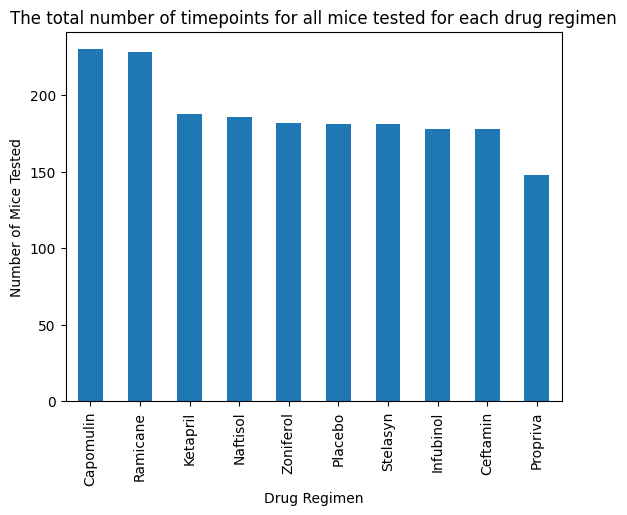

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.



ax = clean_mouse_single_dataset["Drug Regimen"].value_counts().plot(kind="bar", title="The total number of timepoints for all mice tested for each drug regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tested")
ax.set_title("The total number of timepoints for all mice tested for each drug regimen")


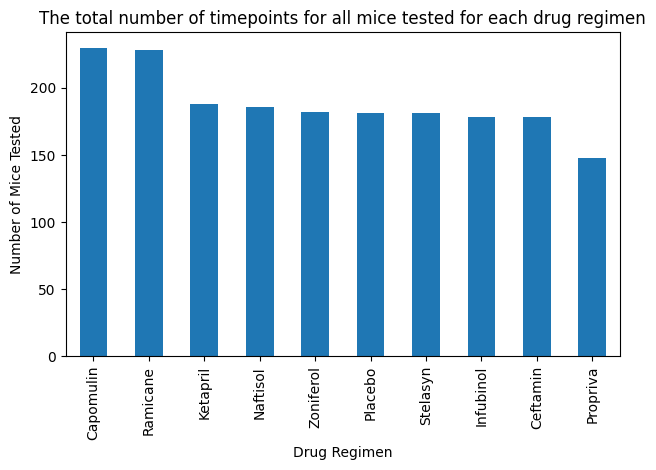

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

clean_mouse_single_dataset["Drug Regimen"].value_counts().plot(kind="bar")
plt.title("The total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()

plt.show()

<AxesSubplot: ylabel='Sex'>

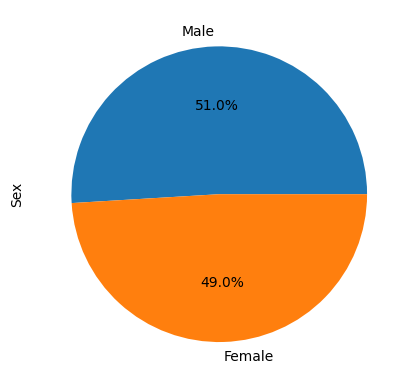

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_mouse_single_dataset["Sex"].value_counts().plot(kind="pie", autopct='%1.1f%%')



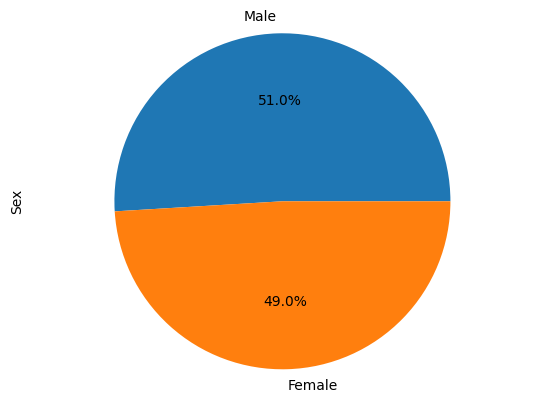

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(clean_mouse_single_dataset["Sex"].value_counts(), labels=clean_mouse_single_dataset["Sex"].value_counts().index.values, autopct='%1.1f%%')
plt.axis("equal")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

final_tumor_volume = clean_mouse_single_dataset.groupby(["Mouse ID"])['Timepoint'].max()
final_tumor_volume = final_tumor_volume.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged = final_tumor_volume.merge(clean_mouse_single_dataset, how="left", on=['Mouse ID','Timepoint'])

final_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_merged.loc[final_merged["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


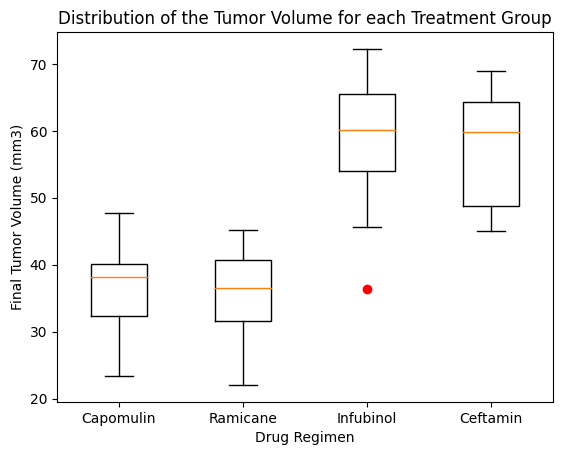

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments, sym='r')
plt.title('Distribution of the Tumor Volume for each Treatment Group')
plt.xlabel("Drug Regimen")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

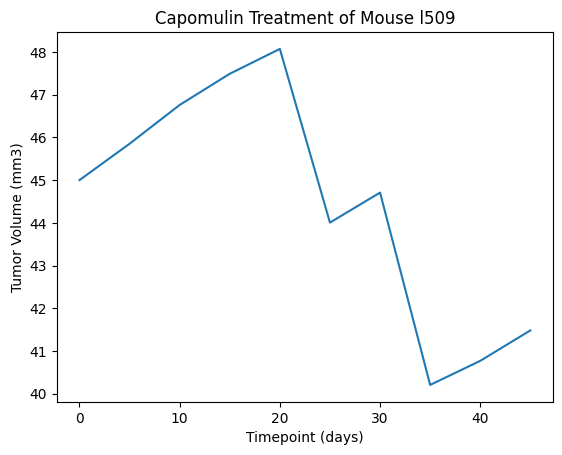

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_capomulin = clean_mouse_single_dataset.loc[clean_mouse_single_dataset['Drug Regimen'] == "Capomulin"]

mouse_capomulin_line = mouse_capomulin.loc[mouse_capomulin['Mouse ID'] == 'l509']

plt.plot(mouse_capomulin_line['Timepoint'], mouse_capomulin_line['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

plt.show()

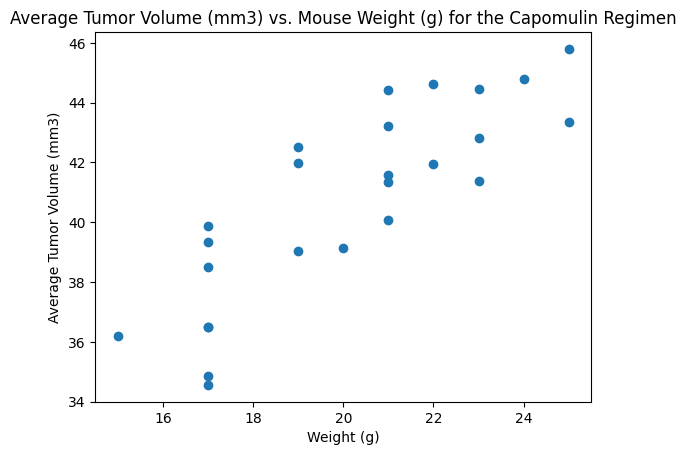

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_regimen = clean_mouse_single_dataset.loc[clean_mouse_single_dataset['Drug Regimen'] == "Capomulin"]
capomulin_mean = capomulin_regimen.groupby(['Mouse ID']).mean(numeric_only=True)
                                
plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g) for the Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


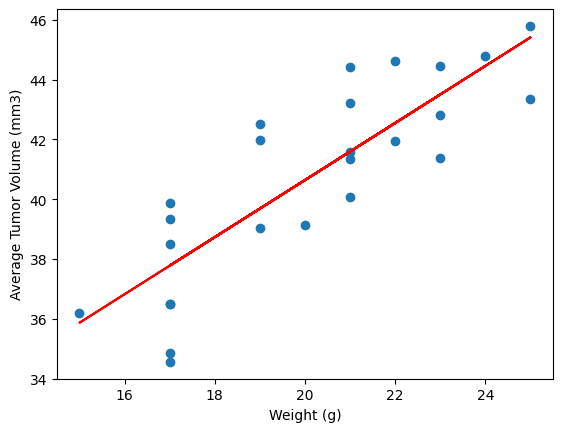

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])

y_values = capomulin_mean['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
plt.plot(capomulin_mean['Weight (g)'],y_values, c='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()